# Feature Selection
In the Feature Selection section, each classification model—Logistic Regression, Support Vector Classifier, and Random Forest Classifier—is retrained using pipelines that include a feature selection step. The process identifies and keeps only the most relevant predictors by using L1 regularization for the logistic and SVC models and feature importance scores for the random forest. After feature selection, the models are re-evaluated and compared to their base versions using ROC curves to determine whether reducing the number of features improves model performance and generalization.

### Logistic Classifier (with feature selection)
- Now we train a logistic regression pipeline that preprocesses the data, performs feature selection using an L1-regularized logistic model to drop less important features, and then fits a logistic regression classifier to the preprocessed and feature selected dataset.

In [ ]:
# Create logistic classifier pipeline instance with feature selection
logistic_fs_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor_transformer),
    ('selector', SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=200))),
    ('classifier', LogisticRegression(max_iter=2000, n_jobs=-1))
])

# Fit model
logistic_fs_pipe.fit(X_train, y_train)

# Show the dropped features
show_selected_features(logistic_fs_pipe, 'Logistic Classification (with feature selection)')

Logistic Classification Feature Selection:

81 of the 98 features are used in modeling

Features dropped from model:
	cat__workclass_Never-worked
	cat__workclass_Private
	cat__occupation_Armed-Forces
	cat__occupation_Craft-repair
	cat__occupation_None
	cat__race_Other
	cat__race_White
	cat__native-country_Ecuador
	cat__native-country_El-Salvador
	cat__native-country_Guatemala
	cat__native-country_Haiti
	cat__native-country_Holand-Netherlands
	cat__native-country_Honduras
	cat__native-country_Jamaica
	cat__native-country_Japan
	cat__native-country_Nicaragua
	cat__native-country_Outlying-US(Guam-USVI-etc)



Logistic Classification Learning Curve:


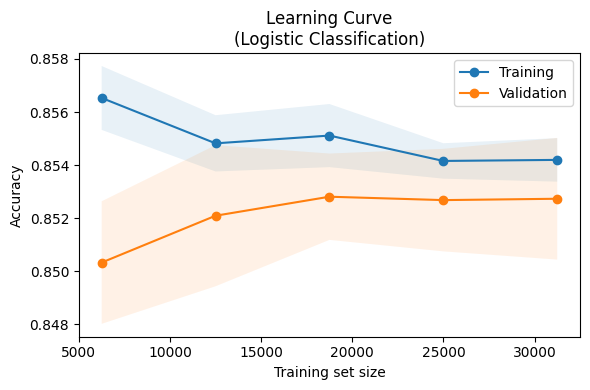


Logistic Classification Report:
              precision    recall  f1-score   support

       <=50K     0.8834    0.9374    0.9096      7426
        >50K     0.7531    0.6068    0.6720      2337

    accuracy                         0.8582      9763
   macro avg     0.8182    0.7721    0.7908      9763
weighted avg     0.8522    0.8582    0.8527      9763

Accuracy: 0.8582

Logistic Classification Confusion Matrix:


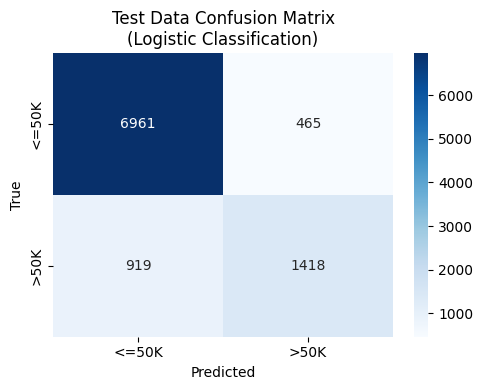

In [ ]:
# Create classification output
logistic_fs_accuracy = create_classification_output(logistic_fs_pipe, 'Logistic Classification (with feature selection)')

> After applying feature selection, the logistic regression model achieved an accuracy of 85.8%, maintaining similar performance to the base model while using fewer features. The model continued to predict ≤50K incomes with high recall (93.7%) but showed lower recall (60.7%) for >50K, indicating it generalizes well but may still under-identify higher-income individuals.

### Support Vector Classifier (with feature selection)
- This code builds and trains a support vector classifier pipeline that preprocesses the data, uses an L1-regularized linear SVC to select the most important features, and then fits an RBF-kernel SVC for final classification..

In [ ]:
# Create support vector classifier pipeline instance
svc_fs_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor_transformer),
    ('selector', SelectFromModel(LinearSVC(penalty="l1", dual=False, C=0.25, tol=1e-3, max_iter=50000))),
    ('classifier', SVC(kernel='rbf', probability=True, random_state=42))
])

# Fit model
svc_fs_pipe.fit(X_train, y_train)

# Show the dropped features
show_selected_features(svc_fs_pipe, 'Support Vector Classifier (with feature selection)')

Support Vector Classifier Feature Selection:

83 of the 98 features are used in modeling

Features dropped from model:
	cat__workclass_Never-worked
	cat__workclass_Private
	cat__occupation_Armed-Forces
	cat__occupation_None
	cat__relationship_Not-in-family
	cat__race_Other
	cat__native-country_Cuba
	cat__native-country_Ecuador
	cat__native-country_El-Salvador
	cat__native-country_Haiti
	cat__native-country_Holand-Netherlands
	cat__native-country_Honduras
	cat__native-country_Jamaica
	cat__native-country_Japan
	cat__native-country_Outlying-US(Guam-USVI-etc)



Support Vector Classifier Learning Curve:


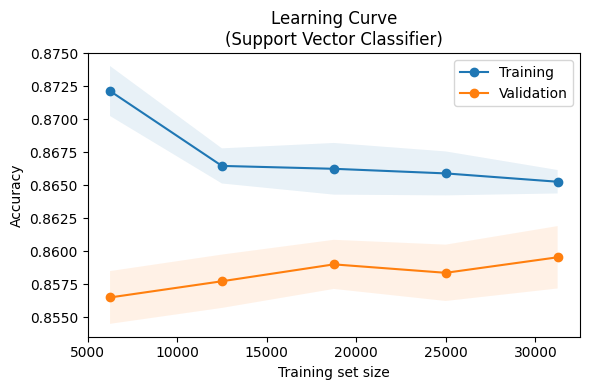


Support Vector Classifier Report:
              precision    recall  f1-score   support

       <=50K     0.8802    0.9504    0.9140      7426
        >50K     0.7890    0.5888    0.6743      2337

    accuracy                         0.8639      9763
   macro avg     0.8346    0.7696    0.7941      9763
weighted avg     0.8583    0.8639    0.8566      9763

Accuracy: 0.8639

Support Vector Classifier Confusion Matrix:


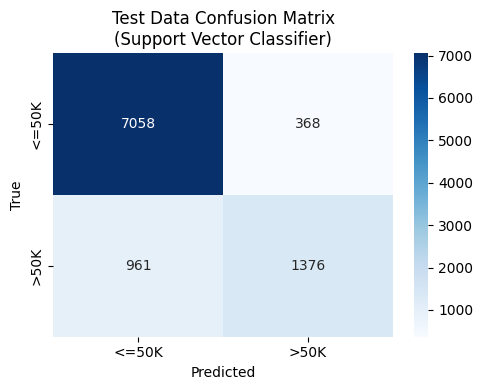

In [ ]:
# Create classification output
svc_fs_accuracy = create_classification_output(svc_fs_pipe, 'Support Vector Classifier (with feature selection)')

> With feature selection applied, the support vector classifier achieved an accuracy of 86.4%, maintaining strong generalization and consistent performance with the base model. It performed very well for predicting ≤50K incomes (95.0% recall) but continued to show lower recall (58.9%) for >50K, indicating slightly better precision but limited improvement in identifying higher-income individuals.

### Random Forest Classifier (with feature selection)
- This code creates and trains a random forest pipeline that preprocesses the data, selects important features based on feature importance scores from an initial random forest, and then fits a final random forest classifier using those selected features.

In [ ]:
# Create random forest classifier pipeline instance
rf_fs_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor_transformer),
    ('selector', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1))
])

# Fit model
rf_fs_pipe.fit(X_train, y_train)

# Show the dropped features
show_selected_features(rf_fs_pipe, 'Random Forest Classifier (with feature selection)')

Random Forest Classifier Feature Selection:

12 of the 98 features are used in modeling

Features dropped from model:
	num__missingindicator_capital-loss
	cat__workclass_Federal-gov
	cat__workclass_Local-gov
	cat__workclass_Never-worked
	cat__workclass_Private
	cat__workclass_Self-emp-inc
	cat__workclass_Self-emp-not-inc
	cat__workclass_State-gov
	cat__workclass_Without-pay
	cat__marital-status_Divorced
	cat__marital-status_Married-AF-spouse
	cat__marital-status_Married-spouse-absent
	cat__marital-status_Separated
	cat__marital-status_Widowed
	cat__occupation_Adm-clerical
	cat__occupation_Armed-Forces
	cat__occupation_Craft-repair
	cat__occupation_Farming-fishing
	cat__occupation_Handlers-cleaners
	cat__occupation_Machine-op-inspct
	cat__occupation_None
	cat__occupation_Other-service
	cat__occupation_Priv-house-serv
	cat__occupation_Protective-serv
	cat__occupation_Sales
	cat__occupation_Tech-support
	cat__occupation_Transport-moving
	cat__relationship_Not-in-family
	cat__relationship_


Random Forest Classifier Learning Curve:


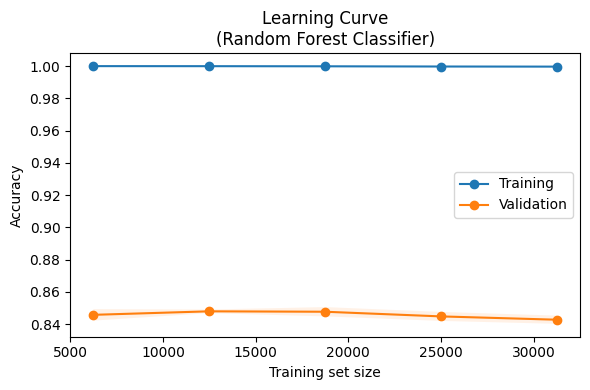


Random Forest Classifier Report:
              precision    recall  f1-score   support

       <=50K     0.8810    0.9188    0.8995      7426
        >50K     0.7012    0.6055    0.6498      2337

    accuracy                         0.8438      9763
   macro avg     0.7911    0.7621    0.7747      9763
weighted avg     0.8379    0.8438    0.8397      9763

Accuracy: 0.8438

Random Forest Classifier Confusion Matrix:


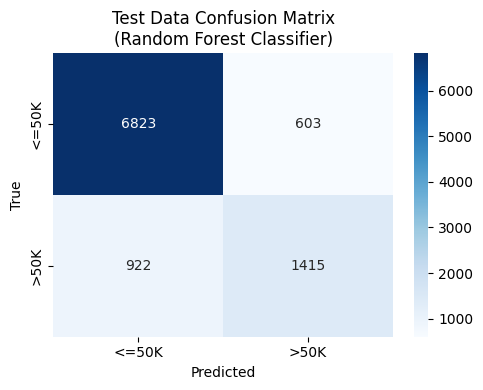

In [49]:
# Create classification output
rf_fs_accuracy = create_classification_output(rf_fs_pipe, 'Random Forest Classifier (with feature selection)')

> After applying feature selection, the random forest classifier achieved an accuracy of 84.4%, performing well on ≤50K incomes (91.9% recall) but less effectively on >50K (60.6% recall). The learning curve shows near-perfect training accuracy and lower validation accuracy, indicating persistent overfitting despite feature reduction.

### ROC Curves - Base vs. Feature Selected Models
- Comparing the base classifiers to the classifiers with feature selection

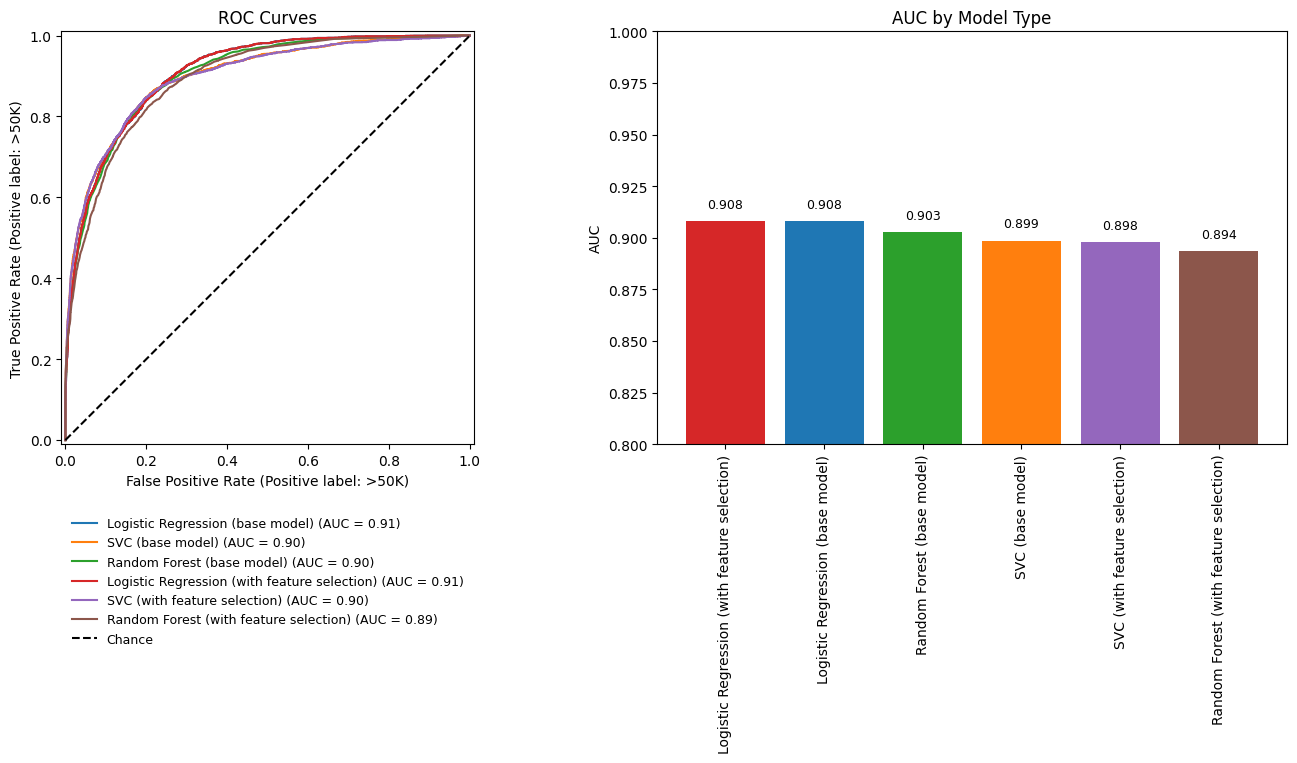

In [50]:
base_and_feature_selection_models = {
    'Logistic Regression (base model)':             logistic_pipe,
    'SVC (base model)':                             svc_pipe,
    'Random Forest (base model)':                   rf_pipe,
    'Logistic Regression (with feature selection)': logistic_fs_pipe,
    'SVC (with feature selection)':                 svc_fs_pipe,
    'Random Forest (with feature selection)':       rf_fs_pipe,
}

make_roc_curves(X_test, y_test, base_and_feature_selection_models)

> The ROC AUC results show that feature selection had minimal impact on overall model performance, with all models achieving similar AUC scores between 0.89 and 0.91. Logistic Regression maintained the highest AUC at 0.91 both before and after feature selection, indicating strong and consistent classification performance across all configurations.  
> 
> The SVC and Random Forest models with feature selection performed slightly worse because the feature selection process likely removed variables that, while individually weak, collectively contributed useful information to the models’ predictive power. Random Forests, in particular, are robust to irrelevant features and can internally handle feature importance, so external selection can actually reduce their effectiveness. Similarly, the SVC with a non-linear RBF kernel captures complex interactions between features, and removing some of them can disrupt those relationships, leading to a small drop in performance. In short, the feature selection simplified the models too much, slightly reducing their ability to capture subtle patterns in the data.

### Feature Selection - Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to clean the dataset
2. Identify any insights/findings made while cleaning (including any foreseen difficulties that could occur during analysis)
3. Give a brief description of what the next step will be in the analysis (Modeling)